## STOCK PRICE PREDICTION - INFOSYS

Data Set Link: https://www.kaggle.com/rohanrao/nifty50-stock-market-data?select=INFY.csv


In [102]:
## Importing libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import warnings
warnings.filterwarnings("ignore")

In [104]:
## Reading CSV 

In [105]:
dfo=pd.read_csv("INFY.csv")

In [106]:
dfo


Date      Symbol Series  Prev Close      Open      High       Low  \
0     2000-01-03  INFOSYSTCH     EQ    14467.75  15625.00  15625.20  15625.00   
1     2000-01-04  INFOSYSTCH     EQ    15625.20  16800.00  16875.25  16253.00   
2     2000-01-05  INFOSYSTCH     EQ    16855.90  15701.00  16250.00  15507.45   
3     2000-01-06  INFOSYSTCH     EQ    15507.45  15256.65  15300.00  14266.85   
4     2000-01-07  INFOSYSTCH     EQ    14266.85  13125.50  13125.50  13125.50   
...          ...         ...    ...         ...       ...       ...       ...   
5136  2020-08-25        INFY     EQ      947.40    947.50    948.65    933.60   
5137  2020-08-26        INFY     EQ      938.10    941.25    954.25    938.40   
5138  2020-08-27        INFY     EQ      950.80    960.00    960.95    945.20   
5139  2020-08-28        INFY     EQ      947.05    951.45    952.50    933.05   
5140  2020-08-31        INFY     EQ      935.25    935.25    950.50    914.60   

          Last     Close      VWAP    Volume      Turnover    Trades  \
0     15625.20  15625.20  15625.18      5137  8.026657e+12       NaN   
1     16875.25  16855.90  16646.38     56186  9.352937e+13       NaN   
2     15507.45  15507.45  15786.38    164605  2.598516e+14       NaN   
3     14266.85  14266.85  14462.82     81997  1.185908e+14       NaN   
4     13125.50  13125.50  13125.50      7589  9.960942e+12       NaN   
...        ...       ...       ...       ...           ...       ...   
5136    938.60    938.10    940.65   6233923  5.863928e+14  105761.0   
5137    953.50    950.80    945.03   5153663  4.870350e+14  114894.0   
5138    950.80    947.05    952.03   6154300  5.859108e+14  124639.0   
5139    935.05    935.25    940.50   7593988  7.142135e+14  180829.0   
5140    919.70    928.60    933.36  12808369  1.195481e+15  206060.0   

      Deliverable Volume  %Deliverble  
0                    NaN          NaN  
1                    NaN          NaN  
2                    NaN          NaN  
3                    NaN          NaN  
4                    NaN          NaN  
...                  ...          ...  
5136           3116528.0       0.4999  
5137           2282594.0       0.4429  
5138           2632139.0       0.4277  
5139           4654594.0       0.6129  
5140           6793301.0       0.5304  

[5141 rows x 15 columns]

In [107]:
df=dfo

<AxesSubplot:>

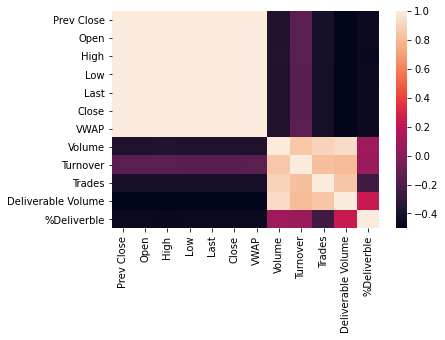

In [108]:
sns.heatmap(dfo.corr())

In [109]:
## seting Date as index

In [110]:
df=df.set_index(['Date'])

In [111]:
##plotting Close and date

<AxesSubplot:xlabel='Date'>

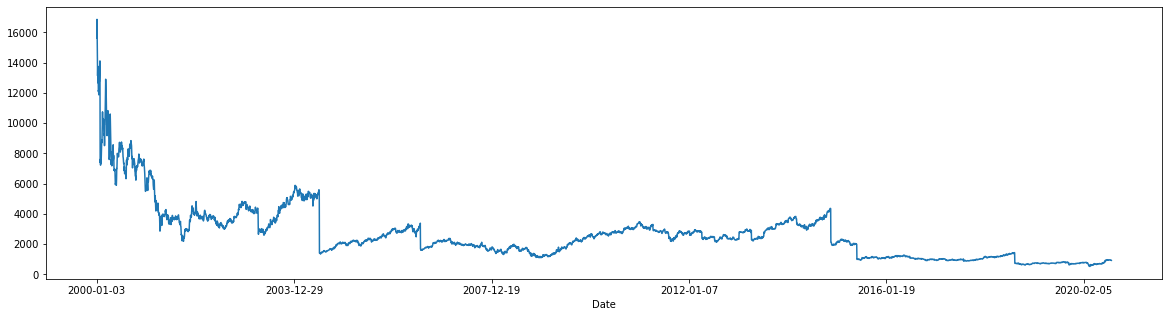

In [112]:
df['Close'].plot(figsize=(20,5))


In [113]:
## plotting Opening price ,Closing price VWAP price

<AxesSubplot:title={'center':'Opening ,Closing ,low ,High and VWAP of Infosys Stock'}, xlabel='Date'>

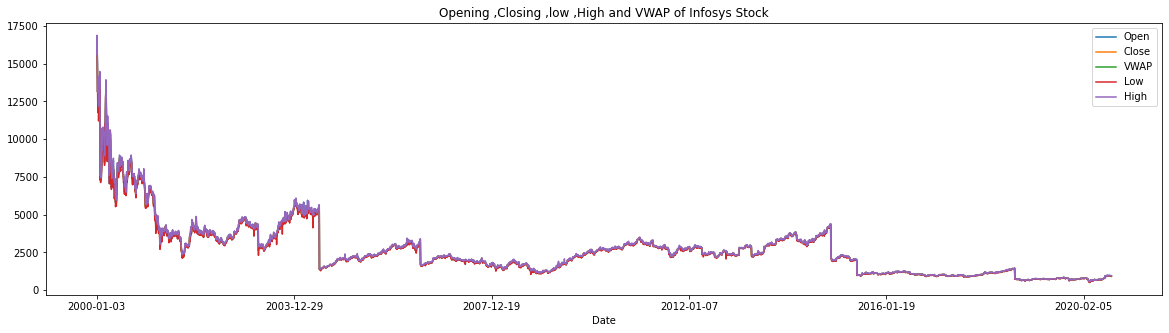

In [114]:
df[['Open','Close','VWAP','Low','High']].plot(figsize=(20,5),title="Opening ,Closing ,low ,High and VWAP of Infosys Stock")

In [115]:
## creating array of Closing price from pandas series

In [116]:
dfc=df.reset_index()['Close']

In [117]:
##reshaping

In [118]:
dfc=np.array(dfc).reshape(-1,1)

In [119]:
dfc

array([[15625.2 ],
       [16855.9 ],
       [15507.45],
       ...,
       [  947.05],
       [  935.25],
       [  928.6 ]])

In [120]:
## Scaling all the prices

In [121]:
scaler=MinMaxScaler(feature_range=(0,1))
dfc=scaler.fit_transform(dfc)

In [122]:
dfc

array([[0.9246331 ],
       [1.        ],
       [0.9174222 ],
       ...,
       [0.02575714],
       [0.02503452],
       [0.02462728]])

In [123]:
## craeting traing and testing dataset 

In [124]:
training_size=int(len(dfc)*0.75)
test_size=len(dfc)-training_size
train_data,test_data=dfc[0:training_size,:],dfc[training_size:len(dfc),:1]

In [125]:
x_train=[]
y_train = []
npo=10 # no of previous output
for i in range(npo,len(train_data)):
    x_train.append(train_data[i-npo:i,0])
    
    y_train.append(train_data[i,0])

In [126]:
x_test=[]
y_test =[]
npo=10 # no of previous output
for i in range(npo,len(test_data)):
    x_test.append(test_data[i-npo:i,0])
    y_test.append(test_data[i,0])


In [127]:
x_train,y_train=np.array(x_train),np.array(y_train)



In [128]:
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))



In [129]:
##creating model

In [130]:
model=Sequential()
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [131]:
##trainging model

In [132]:
model.fit(x_train,y_train,epochs=100,batch_size=64,verbose=2)

Epoch 1/100
61/61 - 1s - loss: 0.0050
Epoch 2/100
61/61 - 1s - loss: 6.5864e-04
Epoch 3/100
61/61 - 1s - loss: 5.8998e-04
Epoch 4/100
61/61 - 1s - loss: 5.8541e-04
Epoch 5/100
61/61 - 1s - loss: 5.7836e-04
Epoch 6/100
61/61 - 1s - loss: 5.6083e-04
Epoch 7/100
61/61 - 1s - loss: 5.4565e-04
Epoch 8/100
61/61 - 1s - loss: 5.3927e-04
Epoch 9/100
61/61 - 1s - loss: 5.1176e-04
Epoch 10/100
61/61 - 1s - loss: 5.0721e-04
Epoch 11/100
61/61 - 1s - loss: 5.2829e-04
Epoch 12/100
61/61 - 1s - loss: 5.3611e-04
Epoch 13/100
61/61 - 1s - loss: 5.0265e-04
Epoch 14/100
61/61 - 1s - loss: 4.6621e-04
Epoch 15/100
61/61 - 1s - loss: 4.7636e-04
Epoch 16/100
61/61 - 1s - loss: 5.2646e-04
Epoch 17/100
61/61 - 1s - loss: 4.5064e-04
Epoch 18/100
61/61 - 1s - loss: 4.3820e-04
Epoch 19/100
61/61 - 1s - loss: 3.9567e-04
Epoch 20/100
61/61 - 1s - loss: 4.0519e-04
Epoch 21/100
61/61 - 1s - loss: 3.8087e-04
Epoch 22/100
61/61 - 1s - loss: 3.7657e-04
Epoch 23/100
61/61 - 1s - loss: 3.4349e-04
Epoch 24/100
61/61 - 1s 

In [133]:
x_test,y_test=np.array(x_test),np.array(y_test)


In [134]:
x_test =np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))


In [135]:
##predicting results from test dataset

In [136]:

test_predict=model.predict(x_test)

In [137]:
##Scaling back

In [138]:

test_predict=scaler.inverse_transform(test_predict)

In [139]:
test_predict

array([[959.6412],
       [959.3909],
       [955.2468],
       ...,
       [915.2927],
       [916.4327],
       [909.9607]], dtype=float32)

In [140]:
y_test=y_test.reshape(-1,1)
y_test=scaler.inverse_transform(y_test)
y_test

array([[990.3 ],
       [983.3 ],
       [980.5 ],
       ...,
       [947.05],
       [935.25],
       [928.6 ]])

In [141]:
##calculating RMSE

In [142]:
math.sqrt(mean_squared_error(y_test,test_predict))

41.031817280088376

In [143]:
dfc=scaler.inverse_transform(dfc)

In [144]:
#creating traindata of length dataset with trainging data

In [145]:
traindata= np.empty_like(dfc)
traindata[:, :] = np.nan

In [146]:
traindata[npo:training_size, :] = dfc[npo:training_size, :]


In [147]:
##creating testPredict of length dataset with test data

In [184]:
testPredict= np.empty_like(df)
testPredict[:, :] = np.nan
testPredict[training_size+(npo):len(dfc),] = test_predict


In [185]:
##plotting Actual Closing price , trained price and predicted price

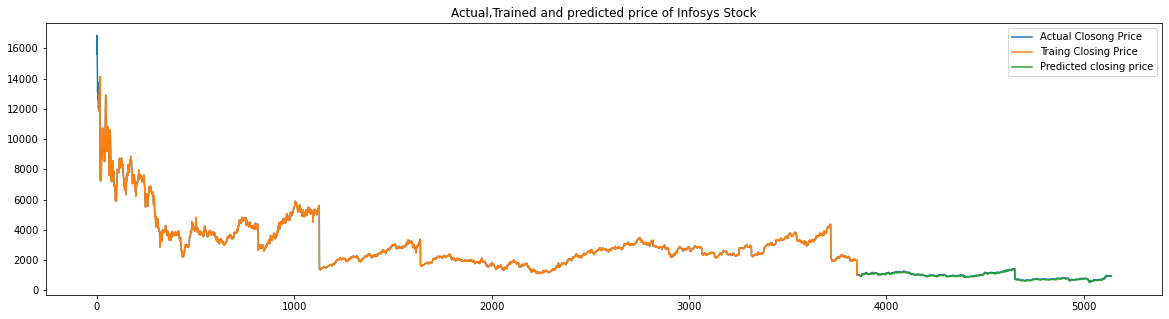

In [186]:
plt.figure(figsize=(20,5))
plt.plot(dfc,label="Actual Closong Price")
plt.plot(traindata,label="Traing Closing Price")
plt.plot(testPredict,label="Predicted closing price")
plt.title("Actual,Trained and predicted price of Infosys Stock")
plt.legend()


In [151]:
## creating dataframe with Closing price and predicted price

In [152]:
df= df.filter(['Close'])


In [153]:
table = df[training_size+npo:]
table.shape
table['Predictions'] = test_predict
table

Close  Predictions
Date                           
2015-07-03  990.30   959.641174
2015-07-06  983.30   959.390930
2015-07-07  980.50   955.246826
2015-07-08  957.50   951.465698
2015-07-09  938.00   936.729065
...            ...          ...
2020-08-25  938.10   917.688599
2020-08-26  950.80   911.203796
2020-08-27  947.05   915.292725
2020-08-28  935.25   916.432678
2020-08-31  928.60   909.960693

[1276 rows x 2 columns]

In [154]:
##Ploting Actual Closing price and predicted Closing price

<AxesSubplot:title={'center':'Closing and Actual price of Infosys Stock'}, xlabel='Date'>

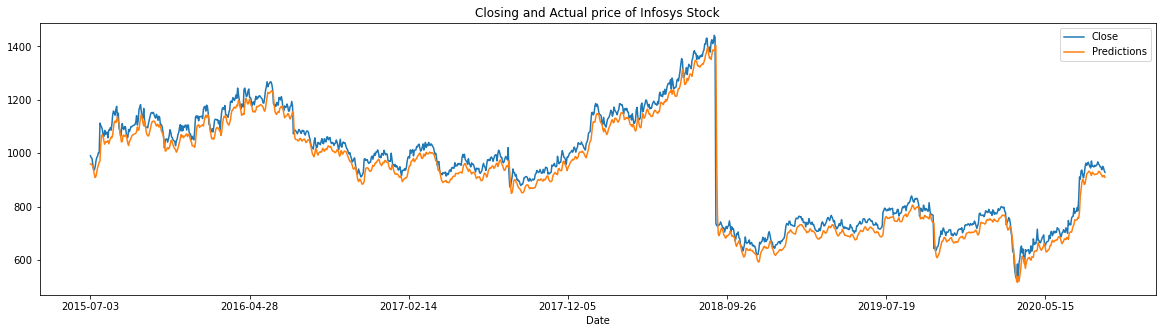

In [155]:
table[['Close','Predictions']].plot(figsize=(20,5),title="Closing and Actual price of Infosys Stock")

# Stock price prediction on last two year of data

## using same method as above








In [181]:
df1=dfo[dfo['Date']>"2018-09-31"]  
df1

Date Symbol Series  Prev Close    Open    High     Low    Last  \
4668  2018-10-01   INFY     EQ      730.05  737.50  754.90  733.00  742.95   
4669  2018-10-03   INFY     EQ      746.65  743.80  751.95  726.30  728.55   
4670  2018-10-04   INFY     EQ      728.50  728.50  729.75  702.50  711.00   
4671  2018-10-05   INFY     EQ      707.20  713.00  731.50  709.30  722.50   
4672  2018-10-08   INFY     EQ      724.60  725.05  728.70  709.25  714.65   
...          ...    ...    ...         ...     ...     ...     ...     ...   
5136  2020-08-25   INFY     EQ      947.40  947.50  948.65  933.60  938.60   
5137  2020-08-26   INFY     EQ      938.10  941.25  954.25  938.40  953.50   
5138  2020-08-27   INFY     EQ      950.80  960.00  960.95  945.20  950.80   
5139  2020-08-28   INFY     EQ      947.05  951.45  952.50  933.05  935.05   
5140  2020-08-31   INFY     EQ      935.25  935.25  950.50  914.60  919.70   

       Close    VWAP    Volume      Turnover    Trades  Deliverable Volume  \
4668  746.65  745.05   8252398  6.148484e+14  160489.0           4483016.0   
4669  728.50  738.21   7792464  5.752480e+14  184479.0           4931984.0   
4670  707.20  711.02   6173037  4.389160e+14  150299.0           3617395.0   
4671  724.60  717.57   8543578  6.130590e+14  141622.0           4727502.0   
4672  714.45  717.09   7259306  5.205582e+14  244347.0           4344672.0   
...      ...     ...       ...           ...       ...                 ...   
5136  938.10  940.65   6233923  5.863928e+14  105761.0           3116528.0   
5137  950.80  945.03   5153663  4.870350e+14  114894.0           2282594.0   
5138  947.05  952.03   6154300  5.859108e+14  124639.0           2632139.0   
5139  935.25  940.50   7593988  7.142135e+14  180829.0           4654594.0   
5140  928.60  933.36  12808369  1.195481e+15  206060.0           6793301.0   

      %Deliverble  
4668       0.5432  
4669       0.6329  
4670       0.5860  
4671       0.5533  
4672       0.5985  
...           ...  
5136       0.4999  
5137       0.4429  
5138       0.4277  
5139       0.6129  
5140       0.5304  

[473 rows x 15 columns]

In [182]:
df1=df1.set_index(['Date'])

<AxesSubplot:title={'center':'Opening ,Closing,High,Low and VWAP of Infosys Stock (Last two year)'}, xlabel='Date'>

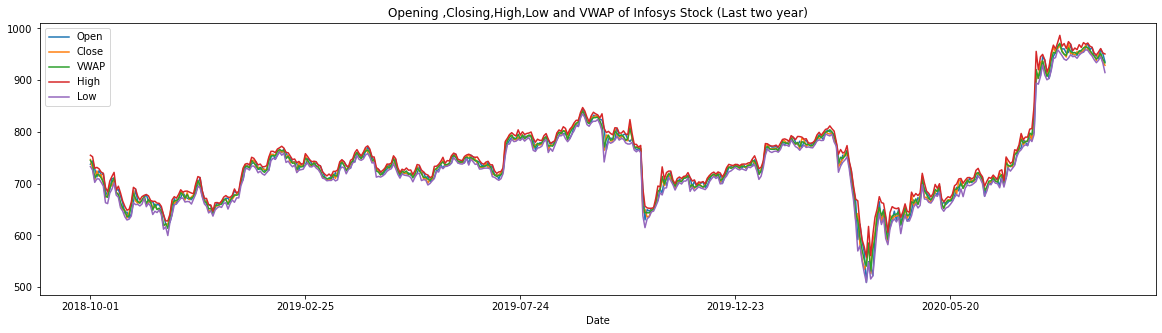

In [183]:
df1[['Open','Close','VWAP','High','Low']].plot(figsize=(20,5),title="Opening ,Closing,High,Low and VWAP of Infosys Stock (Last two year)")

In [159]:
df1c=df1.reset_index()['Close']


In [160]:
df1c=np.array(df1c).reshape(-1,1)


In [161]:
df1c=scaler.fit_transform(df1c)

In [162]:
training_size1=int(len(df1c)*0.75)
test_size1=len(df1c)-training_size1
train_data1,test_data1=df1c[0:training_size1,:],df1c[training_size1:len(df1c),:1]


In [163]:
x_train1=[]
y_train1=[]
npo=10 # no of previous output
for i in range(npo,len(train_data1)):
    x_train1.append(train_data1[i-npo:i,0])
    y_train1.append(train_data1[i,0])

In [164]:
x_test1=[]
y_test1 = []
npo=10 # no of previous output
for i in range(npo,len(test_data1)):
    x_test1.append(test_data1[i-npo:i,0])
    y_test1.append(test_data1[i,0])

In [165]:
x_train1,y_train1=np.array(x_train1),np.array(y_train1)
x_train1 =np.reshape(x_train1,(x_train1.shape[0],x_train1.shape[1], 1))

In [166]:
model.fit(x_train1,y_train1,epochs=100,batch_size=128,verbose=0)

In [167]:
x_test1,y_test1=np.array(x_test1),np.array(y_test1)
x_test1.shape

(109, 10)

In [168]:
x_test1 =np.reshape(x_test1,(x_test1.shape[0],x_test1.shape[1], 1))

In [169]:
test_predict1=model.predict(x_test1)

In [170]:
test_predict1=scaler.inverse_transform(test_predict1)
test_predict1.shape

(109, 1)

In [171]:
y_test1=y_test1.reshape(-1,1)
y_test1=scaler.inverse_transform(y_test1)

In [172]:
math.sqrt(mean_squared_error(y_test1,test_predict1))

27.587247218552037

In [173]:
df1c=scaler.inverse_transform(df1c)


In [174]:
traindata1= np.empty_like(df1c)
traindata1[:, :] = np.nan
traindata1[npo:training_size1, :] = df1c[npo:training_size1, :]

In [175]:
testPredict1= np.empty_like(df1c)
testPredict1[:, :] = np.nan
testPredict1[training_size1+npo:len(df1c), :]= test_predict1

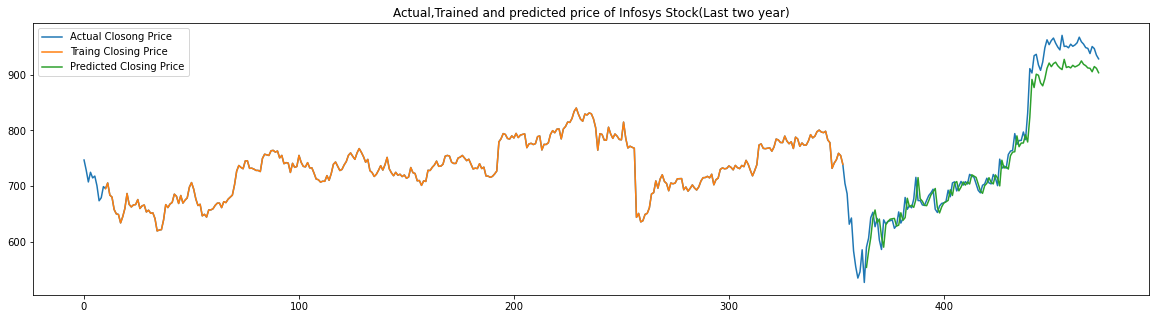

In [176]:
plt.figure(figsize=(20,5))
plt.plot(df1c,label="Actual Closong Price")
plt.plot(traindata1,label="Traing Closing Price")
plt.plot(testPredict1,label="Predicted Closing Price")
plt.title("Actual,Trained and predicted price of Infosys Stock(Last two year)")
plt.legend()
plt.show()

In [177]:
df1= df1.filter(['Close'])

In [178]:
table1 = df1[training_size1+npo:]
table1.shape
table1['Predictions'] = test_predict1
table1

Close  Predictions
Date                           
2020-03-24  589.80   553.546387
2020-03-25  606.20   582.632080
2020-03-26  643.00   606.921448
2020-03-27  652.70   642.148865
2020-03-30  626.70   656.766541
...            ...          ...
2020-08-25  938.10   911.666809
2020-08-26  950.80   905.461243
2020-08-27  947.05   914.731506
2020-08-28  935.25   911.542664
2020-08-31  928.60   903.645020

[109 rows x 2 columns]

<AxesSubplot:title={'center':'Actual and Predicted price of Infosys Stock(Last two year)'}, xlabel='Date'>

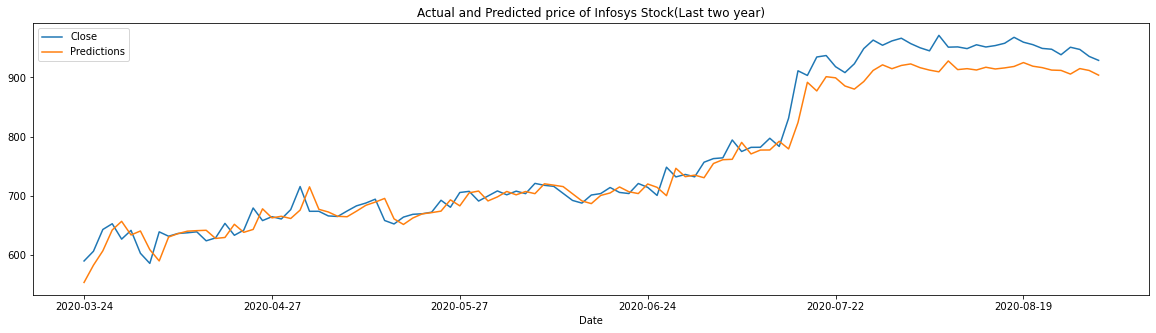

In [179]:
table1[['Close','Predictions']].plot(figsize=(20,5),title="Actual and Predicted price of Infosys Stock(Last two year)")